In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [25]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']

In [26]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [27]:
df.columns

Index(['label', 'message'], dtype='object')

In [28]:
df.shape

(5572, 2)

In [29]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [31]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [32]:
df_object_columns = df.select_dtypes(include='object')
print(df_object_columns)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [33]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.dropna(inplace=True)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [35]:
df['message_length'] = df['message'].apply(len)

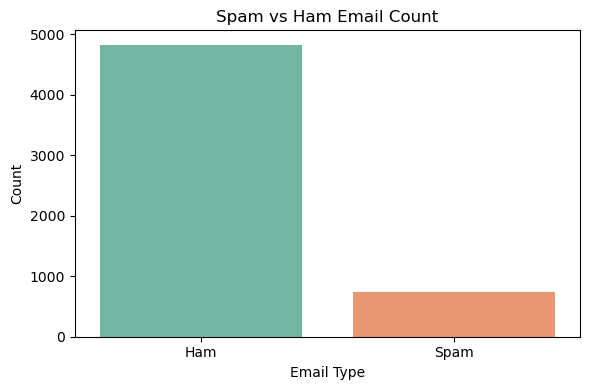

In [36]:
# Plot 1: Count of spam vs ham
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Spam vs Ham Email Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

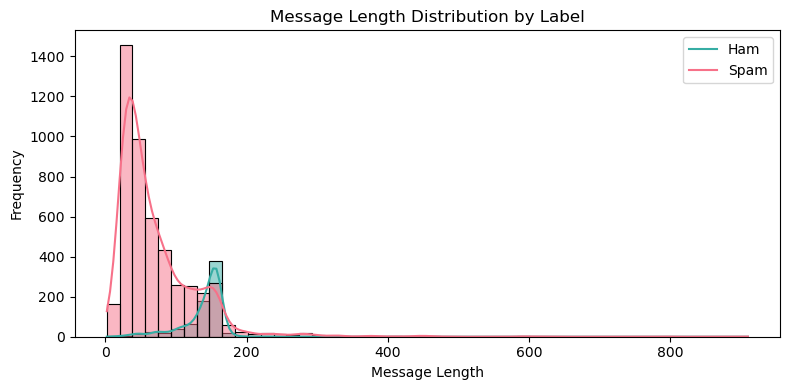

In [37]:
# Plot 2: Distribution of message length
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True, palette='husl')
plt.title('Message Length Distribution by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(['Ham', 'Spam'])
plt.tight_layout()
plt.show()

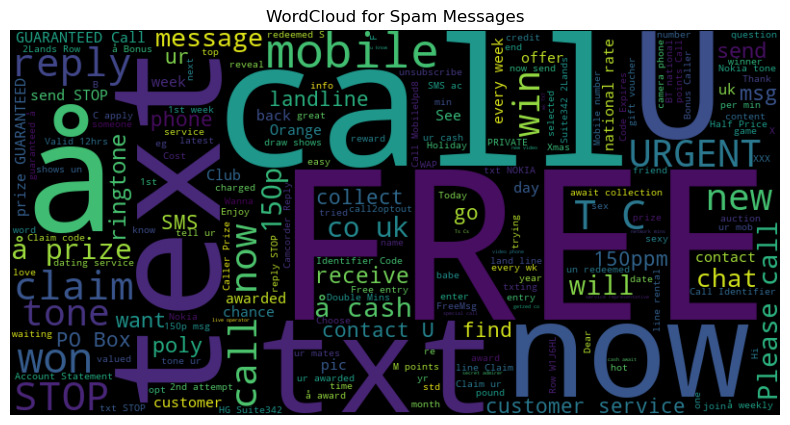

In [38]:
# Plot 3: WordCloud for Spam
spam_words = " ".join(df[df['label'] == 1]['message'])
spam_wc = WordCloud(width=800, height=400, background_color='black').generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Spam Messages')
plt.show()

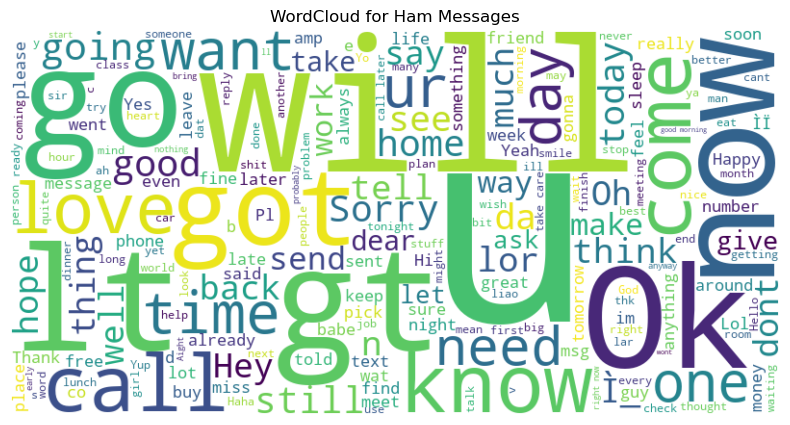

In [39]:
# Plot 4: WordCloud for Ham
ham_words = " ".join(df[df['label'] == 0]['message'])
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Ham Messages')
plt.show()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [41]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [42]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [43]:
y_pred = model.predict(X_test_vec)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9838565022421525

📊 Confusion Matrix:
 [[963   2]
 [ 16 134]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [44]:
def classify_message(message):
    msg_vec = vectorizer.transform([message])
    prediction = model.predict(msg_vec)
    return "Spam" if prediction[0] == 1 else "Not Spam"

In [45]:
print("\n📩 Test Message: 'You have won a $500 prize!' =>", classify_message("You have won a $500 prize!"))


📩 Test Message: 'You have won a $500 prize!' => Spam


## Email Spam Detection Project

This project builds a machine learning model to classify messages as spam or ham using the SMS Spam Collection dataset.

### Key Steps:

* Cleaned and preprocessed \~5,500 labeled messages
* Converted text to numeric features using `CountVectorizer`
* Visualized label distribution, message lengths, and word frequencies
* Trained a `Multinomial Naive Bayes` classifier
* Achieved \~98% accuracy on test data

### Insights:

* Spam messages often have shorter or more repetitive patterns
* WordClouds reveal frequent keywords in spam like "free", "call", "win"
* Model performs well with basic preprocessing and feature extraction

### Next Steps:

* Use TF-IDF or deep learning models
* Deploy as a web app for real-time predictions